In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    roc_curve, precision_recall_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import shap
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.shape

(569, 33)

In [8]:
import os
os.listdir('/content')

['.config', 'drive', 'sample_data']

In [10]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.shape

(569, 33)

In [11]:
# Drop ID column
df = df.drop('id', axis=1)

# Encode diagnosis
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [14]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [15]:
df = df.dropna(axis=1)

In [16]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [17]:
df.isnull().sum().sum()

np.int64(0)

In [18]:
# Remove any completely empty columns (safety step)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Drop ID column if present
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# Encode diagnosis
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Final check for NaN
print("Total NaNs:", df.isnull().sum().sum())

Total NaNs: 569


In [20]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [21]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [22]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [23]:
df['diagnosis'].isnull().sum()

np.int64(0)

In [24]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
df.isnull().sum().sort_values(ascending=False).head(10)

,0
Unnamed: 32,569
id,0
diagnosis,0
texture_mean,0
radius_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
perimeter_mean,0
concave points_mean,0


In [29]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [30]:
df = df.dropna()

In [31]:
print("Total NaNs in dataset:", df.isnull().sum().sum())

Total NaNs in dataset: 0


In [32]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }

import pandas as pd
pd.DataFrame(results).T

,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.964912,0.975,0.928571,0.951220,0.996032
Support Vector Machine,0.964912,0.975,0.928571,0.951220,0.994709
Random Forest,0.956140,1.000,0.880952,0.936709,0.991733
Gradient Boosting,0.964912,1.000,0.904762,0.950000,0.996032


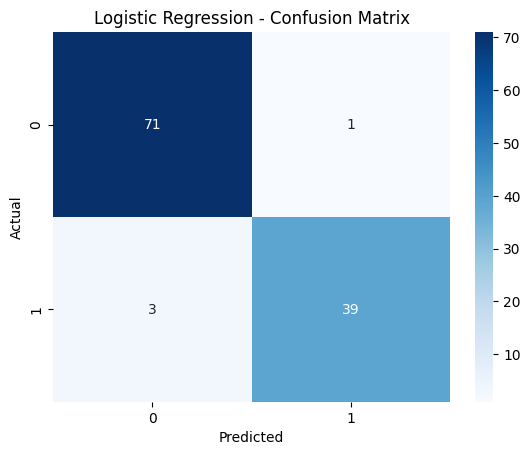

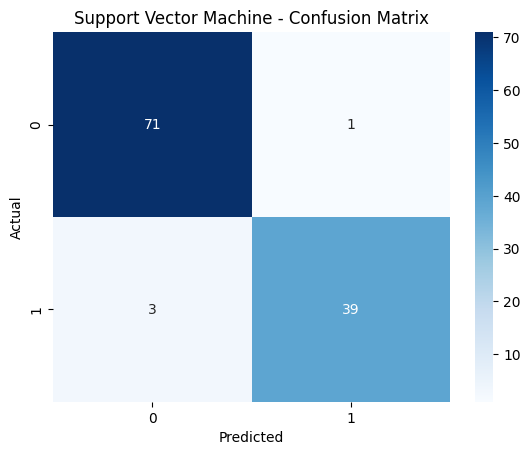

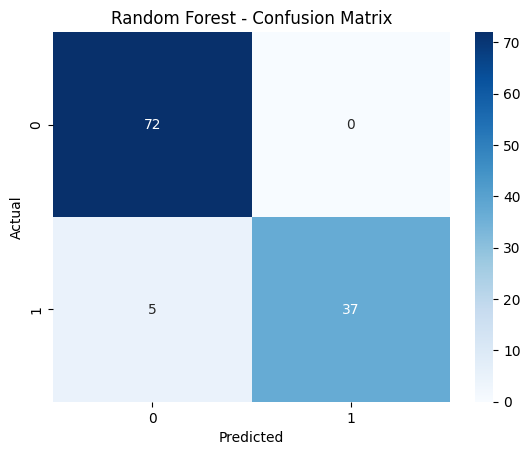

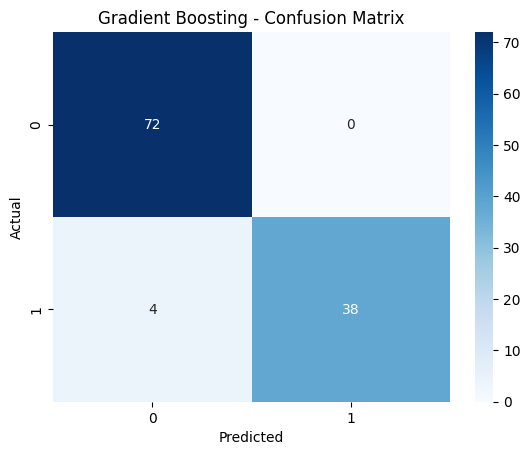

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

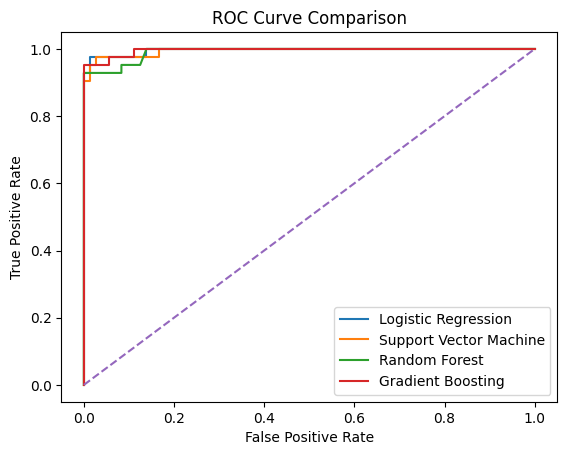

In [38]:
from sklearn.metrics import roc_curve

plt.figure()

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

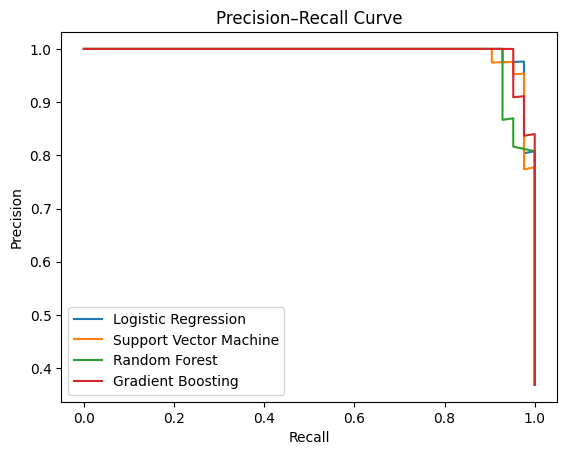

In [39]:
from sklearn.metrics import precision_recall_curve

plt.figure()

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()

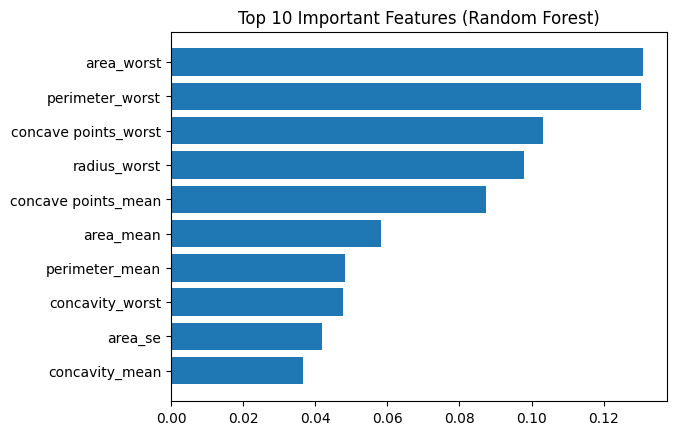

In [40]:
rf = models["Random Forest"]

importances = rf.feature_importances_
feature_names = X.columns

indices = importances.argsort()[-10:]

plt.figure()
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), feature_names[indices])
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

In [44]:
print(type(shap_values))
print(np.array(shap_values).shape)

<class 'numpy.ndarray'>
(114, 31, 2)


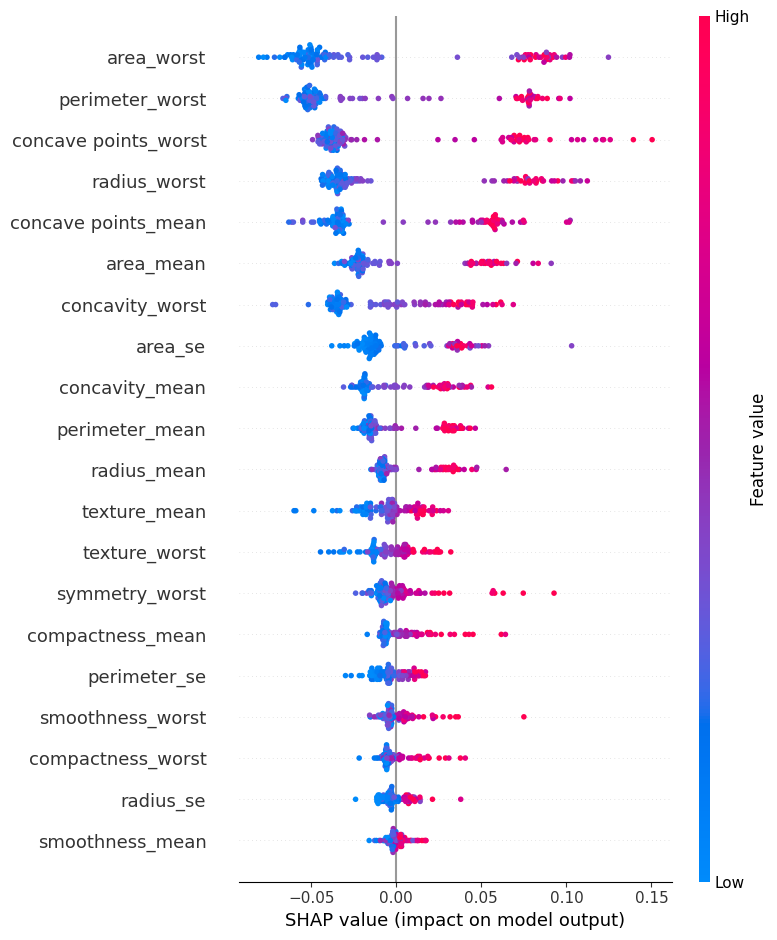

In [45]:
shap.summary_plot(shap_values[:, :, 1], X_test_df)

In [46]:
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)
results_df

,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.9649,0.975,0.9286,0.9512,0.9960
Support Vector Machine,0.9649,0.975,0.9286,0.9512,0.9947
Random Forest,0.9561,1.000,0.8810,0.9367,0.9917
Gradient Boosting,0.9649,1.000,0.9048,0.9500,0.9960


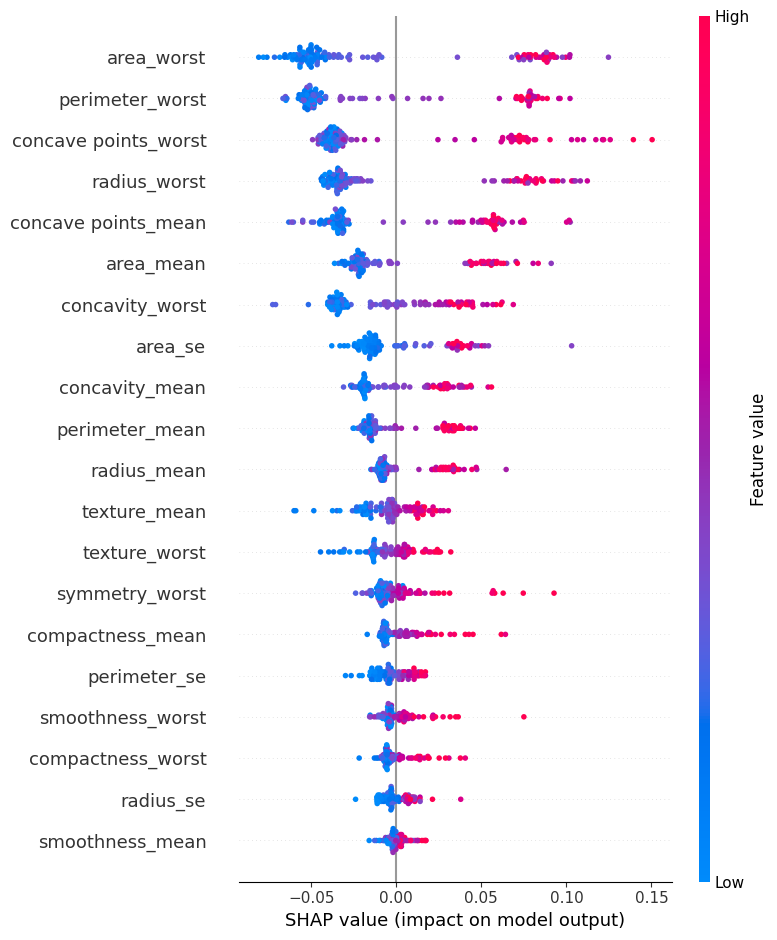

In [47]:
plt.figure(figsize=(10,8))
shap.summary_plot(shap_values[:, :, 1], X_test_df, show=False)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/shap_summary.png', dpi=300)
plt.show()

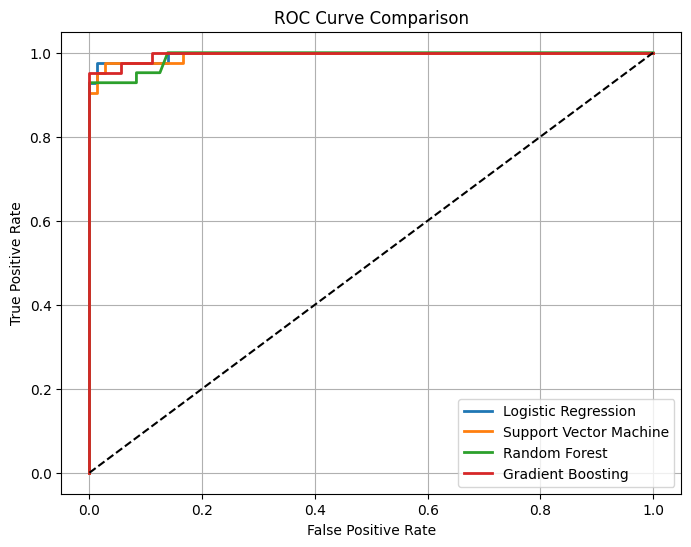

In [48]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, linewidth=2, label=name)

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/roc_curve.png', dpi=300)
plt.show()

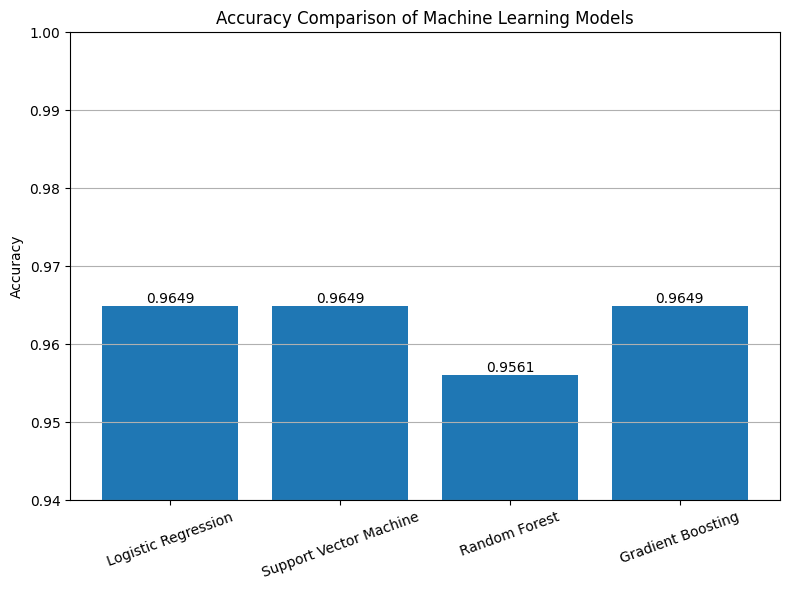

In [49]:
plt.figure(figsize=(8,6))

bars = plt.bar(results_df.index, results_df["Accuracy"])

plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Machine Learning Models")
plt.xticks(rotation=20)
plt.ylim(0.94, 1.00)

# Add accuracy values on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.4f}", ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/accuracy_bar_graph.png', dpi=300)
plt.show()